In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
#from scipy.signal import find_peaks

### Constantes

In [14]:
tau = 3 #[ms] CHEQUEAR CHEQUEAR


#Acoplamientos (adimensionales)
g_ee = 1
g_ii = 1
g_ie = 1
g_ei = 1

#Corrientes externas #[uA/cm^2]
I_e = 10
I_i = 0

#Tiempos
t_ini = 0   #[ms]
t_fin = 100 #[ms]

### Funciones

In [15]:
def derivada(t, u):

#Variables (potencial de cada grupo de neuronas)
    h_e = u[0]
    h_i = u[1]


#Tasa de disparo con relación f-I semilineal
    f_e = 0
    if(h_e > 0):
        f_e = h_e

    f_i = 0
    if(h_i > 0):
        f_i = h_i

#Derivadas
    dh_e = -h_e/tau + g_ee*f_e - g_ei*f_i + I_e 

    dh_i = -h_i/tau + g_ie*f_e - g_ii*f_i + I_i 


    du = [dh_e, dh_i]

    return du

### Solución numérica

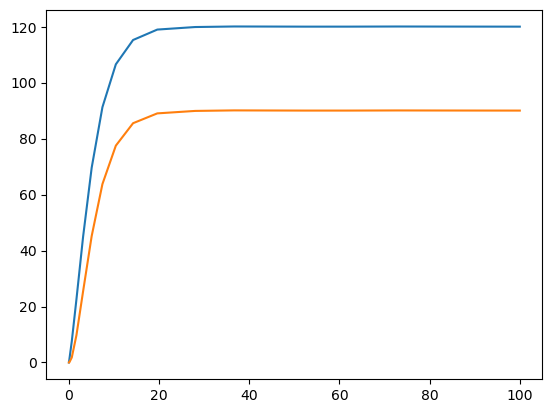

In [16]:
result = solve_ivp(lambda t, u: derivada(t, u), [t_ini, t_fin], [0, 0])

#Resultados de la solución numérica
t = result.t
h_e = result.y[0]
h_i = result.y[1]


plt.plot(t, h_e)
plt.plot(t, h_i)
plt.show()
